# CO544 - MACHINE LEARNING AND DATA MINING
### E/20/420 - WANASINGHE J.K.
### LAB 01

### Necessary Imports

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import accuracy_score


### Exercises 1

#### 1. Generate an array of 20 random integers between 0 and 100:

In [3]:
array = np.random.randint(0,100,size = 20)
print(f"Original Array : {array}")

Original Array : [31  9 66 78 28 68 10 88 66 47 68 62 33 15 16 58 81 55 51 58]


#### 2. Filter values ≥ 50 using boolean indexing:

In [4]:
mask = array >= 50 #a mask array is created by comparing each of the element with 50
filtered_array = array[mask]
print(f"Values >= 50: {filtered_array}")


Values >= 50: [66 78 68 88 66 68 62 58 81 55 51 58]


#### 3. Demonstrate broadcasting:

- In NumPy, broadcasting refers to the ability to perform arithmetic operations between arrays of different shapes in a way that avoids making unnecessary copies of data.

In [5]:
small = np.arange(5) #1D array consist of the all of the integers from 0 upto 4
large = array [:20]. reshape(4,5) ## Create a 4,5 matrix from the number array
result = large + small ##Corresponding rows and columns are added
print(f"large\n {large}\n\n")
print(f"small\n {small}\n\n")
print(f"result\n {result}")

large
 [[31  9 66 78 28]
 [68 10 88 66 47]
 [68 62 33 15 16]
 [58 81 55 51 58]]


small
 [0 1 2 3 4]


result
 [[31 10 68 81 32]
 [68 11 90 69 51]
 [68 63 35 18 20]
 [58 82 57 54 62]]


#### 4. Compute dot product of two arrays of length 10:

In [6]:
a = np.arange(10)
print(a)
b = np.linspace(0, 9, 10) # A column vector is created from 0 to 9 with 10 elements including 0 and 9
print(b)
dp = np.dot(a, b)
print("Dot␣product:", dp)

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Dot␣product: 285.0


### Exercise 2: Matplotlib Subplots

#### 1. Prepare data for sine and cosine functions:

In [7]:
x = np.linspace(0, 2*np.pi, 200)  # Create an array of 200 evenly spaced values between 0 and 2π
y1 = np.sin(x) #Calculate the sin value of the created x values' array
y2 = np.cos(x) #Calculate the cos values

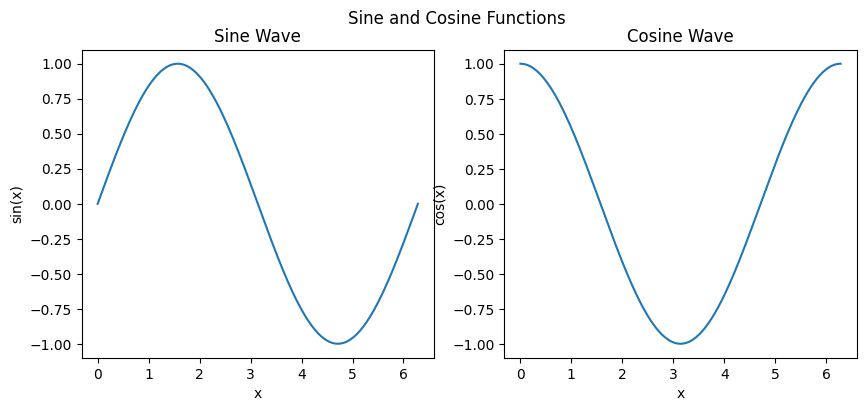

In [8]:
fig , axes = plt.subplots (1,2, sharex=True,figsize=(10,4)) #Create a figure with 2 subplots and the axes
axes [0]. plot(x, y1)
axes [0]. set( title ="Sine Wave", xlabel="x", ylabel="sin(x)")
axes [1]. plot(x, y2)
axes [1]. set( title ="Cosine Wave", xlabel="x", ylabel="cos(x)")
fig.suptitle("Sine and Cosine Functions")
plt.savefig('trig_functions.png')
plt .show()

### Exercise 3: Pandas Cleaning & Preprocessing

#### 1. Load Titanic dataset:

`df.info()` gives a summary: number of entries, columns, data types, and how many non-null values each column has (useful to identify missing data).

In [11]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print(df.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### 2. Impute missing values:

- This improves data quality without dropping entire rows.

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-12-aa691fd28e25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
<ipython-input-12-aa691fd28e25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

#### 3. Drop Duplicates

- Removes rows that are exact duplicates across all columns.

- Ensures the dataset doesn't have repeated data that could bias the analysis.

In [13]:
df.drop_duplicates(inplace=True)

#### 4. Convert and detect outliers in Fare:

- Round Fare to whole numbers and convert to integers → new column `Fare_int`.

- Calculate IQR (Interquartile Range):
>- Q1 = 25th percentile
>- Q3 = 75th percentile
>- IQR = Q3 - Q1 (range of middle 50% of data)

- Outlier Detection Rule:
>- Values below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` are considered outliers.

- Filter and print those outliers.

Why it matters:
- Outliers can skew statistical summaries and model training.
- Depending on analysis, they can be capped or removed

In [16]:
df['Fare_int'] = df['Fare'].round().astype(int)
Q1 = df['Fare_int'].quantile(0.25)
Q3 = df['Fare_int'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare_int'] < Q1 - 1.5 * IQR) | (df['Fare_int'] > Q3 + 1.5 *IQR)]
print(outliers)

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

### Exercise 4: Pandas Essentials

- A Series is a one-dimensional labeled array.

- A DataFrame is a 2D table with rows and columns, the most used structure in Pandas.

#### 1. Create and inspect Series:

In [23]:
s1 = pd.Series ([1,2,4,5])
print(s1.shape, s1.index)
s2 = pd.Series ([1,2,4,5], index=['a','b','c','d'])
print(s2.shape, s2.index)

(4,) RangeIndex(start=0, stop=4, step=1)
(4,) Index(['a', 'b', 'c', 'd'], dtype='object')


#### 2. Build DataFrame and summarize:

In [24]:
df1 = pd.DataFrame({'name':['Alice','Bob','Charlie'], 'score' :[85,92,78]})
df2 = pd.DataFrame(np.random.randn(100,3),columns=list('ABC'))
df1.head(), df1. tail () , df1. info () , df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   score   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


(      name  score
 0    Alice     85
 1      Bob     92
 2  Charlie     78,
       name  score
 0    Alice     85
 1      Bob     92
 2  Charlie     78,
 None,
        score
 count    3.0
 mean    85.0
 std      7.0
 min     78.0
 25%     81.5
 50%     85.0
 75%     88.5
 max     92.0)

#### 3. Indexing with loc/iloc, sorting, and dropping:

- `loc[]` selects data by label/index name.
- `iloc[]` selects data by position/index number.

- Sorting helps in ordering data based on values.
- Dropping columns is useful to remove irrelevant or redundant information.

In [25]:
df1. loc [0, 'score' ], df2. iloc [2]
df2_sorted = df2.sort_values('A',ascending=False)
df2_sorted.drop(['B' ], axis=1).head()

,A,C
83,2.792025,-1.852344
26,2.732017,-1.406689
6,2.686344,-0.989373
97,2.266165,0.769876
53,2.124540,-0.215473


from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['C'].plot(kind='hist', bins=20, title='C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='A', y='C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['C'].plot(kind='line', figsize=(8, 4), title='C')
plt.gca().spines[['top', 'right']].set_visible(False)

#### 4. Handle missing data:

- `df_nan.dropna()` : Drops all rows that have at least one NaN value. So it keeps only rows where all values are present.

- `df_nan.fillna(0)` : Replaces all NaN values with 0.

In [27]:
df_nan = pd.DataFrame({'X':[1, None, 3], 'Y':[None, 2, 3]})
df_nan.dropna(), df_nan.fillna(0)

(     X    Y
 2  3.0  3.0,
      X    Y
 0  1.0  0.0
 1  0.0  2.0
 2  3.0  3.0)

#### 5. Excel I/O:

- Pandas can read and write Excel files using `to_excel()` and `read_excel()`.

In [31]:
df_weather = pd.read_excel('weather.xlsx') #This reads an Excel file named weather.xlsx into a Pandas DataFrame.
print(df_weather.tail()) #Displays the last 5 rows of the DataFrame.
df_weather.to_excel('weather_updated.xlsx') #Writes the DataFrame back to a new Excel file named weather_updated.xlsx


          Date  MaxTemp_C  MinTemp_C  AvgTemp_C  Precip_mm  WindSpeed_kph  \
361 2024-12-27       29.1       20.2       24.7        0.0           12.4   
362 2024-12-28       30.2       16.3       23.2        5.6           12.9   
363 2024-12-29       25.9       16.2       21.1        4.9           11.0   
364 2024-12-30       27.6       19.2       23.4        0.0           17.9   
365 2024-12-31       30.7       18.3       24.5        0.0            8.4   

     Humidity_pct  
361            59  
362            80  
363            83  
364            65  
365            59  


### Exercise 5: Loading Open Dataset from UCI Repository

- Class: wine cultivar (1, 2, or 3).
- `groupby('Class')` is used to analyze statistics for each type of wine in this specific case
- This helps in understanding the differences in chemical composition across wine types.

#### 1. Load Wine dataset:

In [36]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Define column names
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium',
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
           'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']

# Read the CSV into a DataFrame
df_wine = pd.read_csv(url, header=None, names=columns)

# Display basic info
print("Dataset Shape:", df_wine.shape)
print("First 5 rows:\n", df_wine.head())

Dataset Shape: (178, 14)
First 5 rows:
    Class  Alcohol  Malic_Acid   Ash  Alcalinity_Ash  Magnesium  Total_Phenols  \
0      1    14.23        1.71  2.43            15.6        127           2.80   
1      1    13.20        1.78  2.14            11.2        100           2.65   
2      1    13.16        2.36  2.67            18.6        101           2.80   
3      1    14.37        1.95  2.50            16.8        113           3.85   
4      1    13.24        2.59  2.87            21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

#### 2. Group by class:

In [37]:
wine_means = df_wine.groupby('Class').mean()
print(wine_means)

         Alcohol  Malic_Acid       Ash  Alcalinity_Ash   Magnesium  \
Class                                                                
1      13.744746    2.010678  2.455593       17.037288  106.338983   
2      12.278732    1.932676  2.244789       20.238028   94.549296   
3      13.153750    3.333750  2.437083       21.416667   99.312500   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Class                                                                     
1           2.840169    2.982373              0.290000         1.899322   
2           2.258873    2.080845              0.363662         1.630282   
3           1.678750    0.781458              0.447500         1.153542   

       Color_Intensity       Hue  OD280_OD315      Proline  
Class                                                       
1             5.528305  1.062034     3.157797  1115.711864  
2             3.086620  1.056282     2.785352   519.507042  
3             7.396250  0.682

### Exercise 6: scikit-learn Iris Dataset (Extended)

- `load_iris()`: loads flower measurements and their species (setosa, versicolor, virginica).
- `train_test_split`: helps test model generalization on unseen data.
- `LogisticRegression`: linear model good for multi-class classification.
- `classification_report` : includes precision, recall, F1-score for each class.

#### 1. Load and preview Iris:

In [40]:
iris = datasets.load_iris ()
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris ['target'] = iris.target
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


#### 2.Train/test split:

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_iris [ iris .feature_names], df_iris['target'], test_size=0.3, random_state=42)

#### 3. Model training and evaluation:

In [44]:
model = LogisticRegression(max_iter=200)
model.fit (X_train,y_train)
y_pred = model.predict(X_test)
print( classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Model Accuracy

In [47]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

